<a href="https://colab.research.google.com/github/ddangman/2021-sp-stats21/blob/main/importance_sampling_yt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import scipy
from scipy import stats
import scipy.integrate as integrate

import matplotlib.pyplot as plt

In [ ]:
# function of random variable x
#
# Our goal/objective is compute the expected value of h(x)
def h(x):
  return np.exp(-2 * np.abs(x - 5))

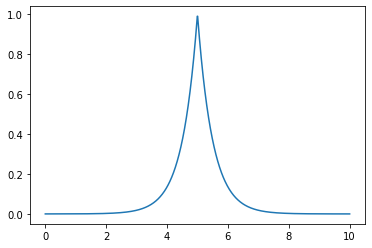

In [ ]:
# let's see how h(x) looks like when plotted
x = np.linspace(0, 10, 1000)
plt.plot(x, h(x), label=r'$h(x)$');

In [ ]:
# h(x) is actually very simple and we can calcuate
# the expected value analytically i.e. using the integration
#
# The exp_val should be approximately 1
exp_val, _ = integrate.quad(h, 0, 10)
exp_val

0.9999546000702377

## Computing the expected value using Monte Carlo (uniform sampling)

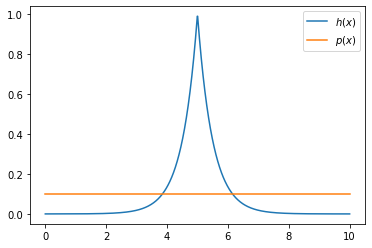

In [ ]:
# let's first plot both h(x) and p(x)

x = np.linspace(0, 10, 1000)
# plot the function of random vairable x i.e. h(x)
plt.plot(x, h(x), label=r'$h(x)$')
# plot the uniform distribution that we would use to sample
plt.plot(x, stats.uniform(0, 10).pdf(x), label=r'$p(x)$')
plt.legend();

We will now do the monte carlo sampling to see when we start to get the expected value

We will also calucate the variance between each sampling

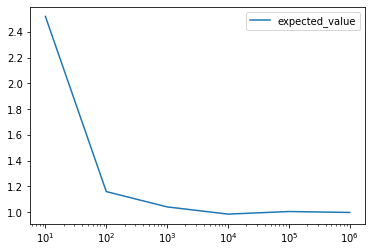

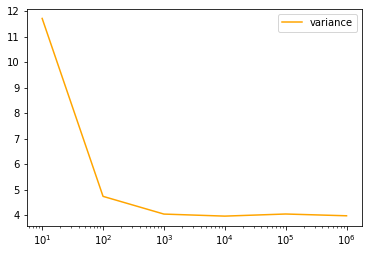

''

In [ ]:
a = 0
b = 10
est = []
error = []
variance = []
n_samples = []

for i in range(1, 7):
    n = int(10**i)
    # print(f"Number of samples {n}")
    # Uniform distribution
    X = stats.uniform(a, b).rvs(n)

    # trick to change the simple
    # function into expected value form
    Y = (b - a) * h(X)

    # calculate the average
    est_un = np.mean(Y)
    # calculate the variance
    var_un = np.var(Y)

    est.append([est_un])
    variance.append([var_un])

    n_samples.append(n)

est = np.array(est)
variance = np.array(variance)

# plot the expected value
plt.plot(n_samples, est, label="expected_value")
plt.xscale('log')
plt.legend()
plt.show()

# plot the variance
plt.plot(n_samples, variance, label="variance", color="orange")
plt.xscale('log')
plt.legend()
plt.show()
;


## Computing the expected value using importance sample

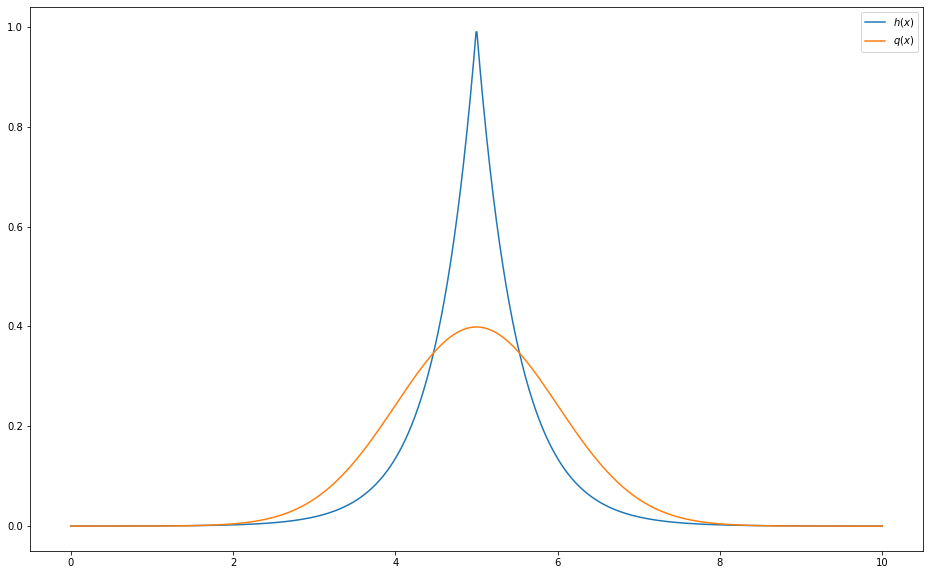

In [ ]:
# let's first plot both h(x) and q(x)
#
# q(x) is the normal distribution centered on 5 and std 1
# This should help sample more efficiently

x = np.linspace(0, 10, 1000)

plt.subplots(figsize=(16,10))

# plot the function of random vairable x i.e. h(x)
plt.plot(x, h(x), label=r'$h(x)$')
# plot the normal distribution that we would use to sample
plt.plot(x, stats.norm(loc=5).pdf(x), label=r'$q(x)$')
plt.legend();

In [ ]:
# importance ratio
#
# Below function will compute the importance ratio
def w(x, a=0, b=10, mu=5, sigma=1):
  return (stats.uniform(a, b).pdf(x) /
          stats.norm(loc=mu, scale=sigma).pdf(x))

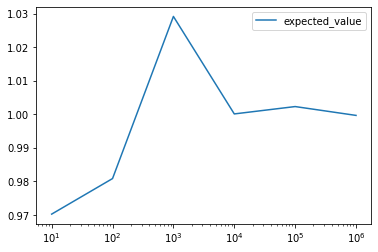

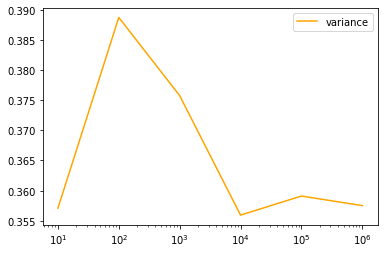

''

In [ ]:
a = 0
b = 10
mu = 5
sigma = 1
est = []
variance = []
n_samples = []

for i in range(1, 7):
    n = int(10**i)

    # Normal distribution
    X = stats.norm(loc=mu, scale=sigma).rvs(n)

    # Now we have the expected value formulation
    # that is using the importance ratio
    Y = (b - a) * w(X) * h(X)

    est_norm = np.mean(Y)
    var_norm = np.var(Y)

    est.append([est_norm])
    variance.append([var_norm])

    n_samples.append(n)

est = np.array(est)
variance = np.array(variance)

# plot the expected value
plt.plot(n_samples, est, label="expected_value")
plt.xscale('log')
plt.legend()
plt.show()

# plot the variance
plt.plot(n_samples, variance, label="variance", color="orange")
plt.xscale('log')
plt.legend()
plt.show()
;


You should observe that the expected value reaches to 1 after about 1000 samples when using importance sampling.

Even more interesting property is that the variance is quite low in comparison to the montel carlo sampling